In [ ]:
#Step:1 # Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Nov 22 16:33:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/
!ls /content/gdrive/MyDrive/yolov3

Mounted at /content/gdrive
ln: failed to create symbolic link './gdrive': File exists
'17th attempt'	 frames_folders.zip
'30th attempt'	 images1.rar
'31th attempt'	 weights
'32th attempt'	 yolov3_testing.cfg
'33th attempt'	'Αντίγραφο του TrainYolov3.ipynb'
 classes.txt	'Αντίγραφο του yolov3_training_final.weights'
 darknet


In [ ]:
# Configure
%cd /content/gdrive/MyDrive/yolov3/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/gdrive/MyDrive/yolov3/darknet


In [ ]:
# Compile
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

In [ ]:
#Step 4: Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg
#!cp cfg/Gaussian_yolov3_BDD.cfg cfg/Gaussian_yolov3_BDD_training.cfg

In [ ]:
#Step 5: Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 6000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '22 s@steps=400000,450000@steps=4800,5400@' cfg/yolov3_training.cfg

In [ ]:
#Step 6: Create .names and .data files.
!echo -e 'traffic light green\ntraffic light red\ntraffic light yellow' > data/obj.names
!echo -e 'classes= 3\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/gdrive/MyDrive/yolov3' > data/obj.data
#!echo classes=3 > obj.data
#!echo train=train.txt >> obj.data
#!echo valid=test.txt >> obj.data
#!echo names=obj.names >> obj.data
#!echo backup=backup >> obj.data

In [ ]:
#Step 7: Save yolov3_training.cfg and obj.names files in Google Drive.
!cp cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /content/gdrive/MyDrive/yolov3/classes.txt

In [ ]:
#Step 8: Unzip the images dataset.
!mkdir data/obj
!unzip /content/gdrive/MyDrive/yolov3/train.zip -d data/obj/train

mkdir: cannot create directory ‘data/obj’: File exists
Archive:  /content/gdrive/MyDrive/yolov3/train.zip
 extracting: data/obj/train/out00000.png  
  inflating: data/obj/train/out00000.txt  
 extracting: data/obj/train/out00002.png  
  inflating: data/obj/train/out00002.txt  
 extracting: data/obj/train/out00004.png  
  inflating: data/obj/train/out00004.txt  
 extracting: data/obj/train/out00006.png  
  inflating: data/obj/train/out00006.txt  
 extracting: data/obj/train/out00008.png  
  inflating: data/obj/train/out00008.txt  
 extracting: data/obj/train/out00010.png  
  inflating: data/obj/train/out00010.txt  
 extracting: data/obj/train/out00012.png  
  inflating: data/obj/train/out00012.txt  
 extracting: data/obj/train/out00014.png  
  inflating: data/obj/train/out00014.txt  
 extracting: data/obj/train/out00016.png  
  inflating: data/obj/train/out00016.txt  
 extracting: data/obj/train/out00018.png  
  inflating: data/obj/train/out00018.txt  
 extracting: data/obj/train/out000

In [ ]:
!mkdir data/obj/test
!unzip /content/gdrive/MyDrive/yolov3/valid.zip -d data/obj/valid

Archive:  /content/gdrive/MyDrive/yolov3/valid.zip
 extracting: data/obj/valid/out02264.png  
  inflating: data/obj/valid/out02264.txt  
 extracting: data/obj/valid/out02266.png  
  inflating: data/obj/valid/out02266.txt  
 extracting: data/obj/valid/out02268.png  
  inflating: data/obj/valid/out02268.txt  
 extracting: data/obj/valid/out02270.png  
  inflating: data/obj/valid/out02270.txt  
 extracting: data/obj/valid/out02272.png  
  inflating: data/obj/valid/out02272.txt  
 extracting: data/obj/valid/out02274.png  
  inflating: data/obj/valid/out02274.txt  
 extracting: data/obj/valid/out02276.png  
  inflating: data/obj/valid/out02276.txt  
 extracting: data/obj/valid/out02278.png  
  inflating: data/obj/valid/out02278.txt  
 extracting: data/obj/valid/out02280.png  
  inflating: data/obj/valid/out02280.txt  
 extracting: data/obj/valid/out02282.png  
  inflating: data/obj/valid/out02282.txt  
 extracting: data/obj/valid/out02284.png  
  inflating: data/obj/valid/out02284.txt  
 ex

In [ ]:
!mkdir data/obj/valid
!unzip /content/gdrive/MyDrive/yolov3/test.zip -d data/obj/test

mkdir: cannot create directory ‘data/obj/valid’: File exists
Archive:  /content/gdrive/MyDrive/yolov3/test.zip
replace data/obj/test/Frame_traffic_lights00001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import glob
images_list = glob.glob("/content/gdrive/MyDrive/yolov3/darknet/data/obj/train/*.png")
with open("data/train.txt", "a") as f:
     f.write("\n".join(images_list))

In [ ]:
#Step 9:Create train.txt file.
import glob
images_list = glob.glob("/content/gdrive/MyDrive/yolov3/darknet/data/obj/train/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
images_list = glob.glob("/content/gdrive/MyDrive/yolov3/darknet/data/obj/valid/*.jpg")
with open("data/test.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
 images_list = glob.glob("/content/gdrive/MyDrive/yolov3/darknet/data/obj/valid/*.png")
 with open("data/test.txt", "a") as f:
     f.write("\n".join(images_list))

In [ ]:
import glob 
images_list = glob.glob("/content/gdrive/MyDrive/yolov3/darknet/data/obj/test/*.jpg")
with open("data/valid.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
# Step 10:Download pre-trained weights for the convolutional layers file.
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-09-12 15:48:17--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.54’

darknet53.conv.74.5 100%[===================>] 154.96M  34.0MB/s    in 4.8s    

2021-09-12 15:48:22 (32.5 MB/s) - ‘darknet53.conv.74.54’ saved [162482580/162482580]



In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights -dont_show -map
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_final.weights | tee log.txt

In [ ]:
# Step 11:Start training.
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map | tee output.log
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map | tee output.log
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg -dont_show -map | tee output.log
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights -dont_show -map | tee output.log

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Loaded: 0.000077 seconds

 (next mAP calculation at 1000 iterations) 
 177: 7.546324, 17.724874 avg loss, 0.000001 rate, 11.489174 seconds, 11328 images, 26.014904 hours left
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 4.628441, iou_loss = 0.000000, total_loss = 4.628441 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.391844), count: 5, class_loss = 6.169151, iou_loss = 2.471238, total_loss = 8.640388 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 3.500575, iou_loss = 0.000000, total_loss = 3.500575 
 total_bbox = 24860, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 4.530675, iou_loss = 0.000000, total_loss = 4.530675 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 2>1 | tee visualization/output.log

tee: visualization/output.log: No such file or directory
^C


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
imShow('chart.png')

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_training.cfg
%cd ..

/content/gdrive/MyDrive/yolov3/darknet/cfg
/content/gdrive/My Drive/yolov3/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

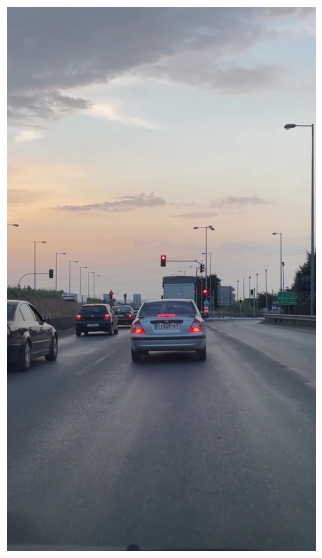

In [ ]:
#import matplotlib.pyplot as plt
#import numpy
#from IPython.display import Image, display
#import glob
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
#!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights /content/gdrive/MyDrive/yolov3/test/1.jpg -thresh 0.3
#plt.imshow(numpy.float('predictions.jpg'))
#plt.imshow('predictions.jpg')
#for imageName in glob.glob('/content/gdrive/MyDrive/yolov3/test/*.jpg'):
#!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_training_last.weights /content/gdrive/MyDrive/yolov3/test/103214_png.rf.5aa05ad187f9ae26d2c12fdbf940b283.jpg -thresh 0.3
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/weights/Carla_and_Real-world-images_withoutCarlavalid_/yolov3_training_best.weights /content/Frame_traffic_lights136961.jpg -thresh 0.3
#!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/weights/Carla_and_blurred_images/yolov3_training_final.weights -dont_show < /content/gdrive/MyDrive/yolov3/darknet/data/valid.txt > result.txt
#!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/weights/yolov3_training_last.weights < /content/gdrive/MyDrive/yolov3/darknet/data/valid.txt > result.txt
imShow('predictions.jpg')